# Read the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data_all = pd.read_csv('../dataset/loanprediction.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
data_all.head(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [3]:
data_all.shape

(252000, 12)

In [4]:
#sorry keith copy from you lmao
data_all.columns = ['income', 'age', 'experience', 'marital_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag']
numerical = ["income", "age", "experience", "current_job_yrs", "current_house_yrs"]
categorical = ["marital_status", "house_ownership", "car_ownership", "profession", "city", "state"] 

In [5]:
data_all.columns

Index(['income', 'age', 'experience', 'marital_status', 'house_ownership',
       'car_ownership', 'profession', 'city', 'state', 'current_job_yrs',
       'current_house_yrs', 'risk_flag'],
      dtype='object')

In [6]:
data_all.head(5)

,income,age,experience,marital_status,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
Id,,,,,,,,,,,,
1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
for column in categorical:
    unique_categories = data_all[column].nunique()
    print( column, ":" + str(unique_categories) )

marital_status :2
house_ownership :3
car_ownership :2
profession :51
city :317
state :29


In [8]:
data_all['state'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: state, dtype: int64

# Encoding the categorical

In [9]:
#pip install category_encoders
#pip install imbalanced-learn
#this is the first encode, dont run this

In [10]:
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [11]:
#label_encoder = LabelEncoder()

#for col in ['marital_status','car_ownership']:
#    data_all[col] = label_encoder.fit_transform(data_all[col])

In [12]:
#onehot_encoder = OneHotEncoder(sparse = False)
#data_all['house_ownership'] = onehot_encoder.fit_transform(data_all['house_ownership'].values.reshape(-1, 1) )

In [13]:
#high_card_features = ['profession', 'city', 'state']

#count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
#count_encoded = count_encoder.fit_transform(data_all[high_card_features])
#data_all = data_all.join(count_encoded.add_suffix("_count"))

In [14]:
# remove old columns
#data_all.drop(labels=['profession', 'city', 'state'], axis=1, inplace=True)
#data_all.head()

In [15]:
#Try it another way

In [16]:
for col in categorical:
    data_all = pd.concat([data_all, pd.get_dummies(data_all[col], prefix = col+'_=')], axis = 1).drop(col, axis = 1)

In [17]:
data_all.head(5)

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,marital_status_=_married,marital_status_=_single,house_ownership_=_norent_noown,house_ownership_=_owned,...,state_=_Punjab,state_=_Rajasthan,state_=_Sikkim,state_=_Tamil_Nadu,state_=_Telangana,state_=_Tripura,state_=_Uttar_Pradesh,state_=_Uttar_Pradesh[5],state_=_Uttarakhand,state_=_West_Bengal
Id,,,,,,,,,,,,,,,,,,,,,
1,1303834,23,3,3,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7574516,40,10,9,13,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3991815,66,4,4,10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6256451,41,2,2,12,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5768871,47,11,3,14,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Scaling 

In [18]:
from sklearn.preprocessing import StandardScaler

for col in numerical:
    data_all[col] = StandardScaler().fit_transform(data_all[col].values.reshape(-1, 1))
data_all.head()

,income,age,experience,current_job_yrs,current_house_yrs,risk_flag,marital_status_=_married,marital_status_=_single,house_ownership_=_norent_noown,house_ownership_=_owned,...,state_=_Punjab,state_=_Rajasthan,state_=_Sikkim,state_=_Tamil_Nadu,state_=_Telangana,state_=_Tripura,state_=_Uttar_Pradesh,state_=_Uttar_Pradesh[5],state_=_Uttarakhand,state_=_West_Bengal
Id,,,,,,,,,,,,,,,,,,,,,
1,-1.283145,-1.579604,-1.180232,-0.914131,0.716356,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.895457,-0.583344,-0.014067,0.731036,0.716356,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.349269,0.940348,-1.013637,-0.639936,-1.427981,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.437526,-0.524740,-1.346827,-1.188325,0.001577,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.268128,-0.173119,0.152528,-0.914131,1.431135,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# Split them data

In [19]:
x = data_all.drop("risk_flag", axis=1)
y = data_all["risk_flag"]
print('Shape of x: {}'.format(x.shape))
print('Shape of y: {}'.format(y.shape))

Shape of x: (252000, 409)
Shape of y: (252000,)


In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Number transactions x_train dataset: ", x_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions x_test dataset: ", x_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions x_train dataset:  (176400, 409)
Number transactions y_train dataset:  (176400,)
Number transactions x_test dataset:  (75600, 409)
Number transactions y_test dataset:  (75600,)


# Oversample 

In [21]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(x_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 21734
Before OverSampling, counts of label '0': 154666 

After OverSampling, the shape of train_X: (309332, 409)
After OverSampling, the shape of train_y: (309332,) 

After OverSampling, counts of label '1': 154666
After OverSampling, counts of label '0': 154666


# How to train your data

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3, max_iter=10000)
clf.fit(x_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\tranl\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [23]:
clf.best_params_

{'C': 10.0}

In [24]:
lr1 = LogisticRegression(C=4,verbose=5,max_iter=10000) #penalty='l2'
lr1.fit(x_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.8min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.8min finished


LogisticRegression(C=4, max_iter=10000, verbose=5)

In [25]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Recall metric in the train dataset: 46.34213674427165%


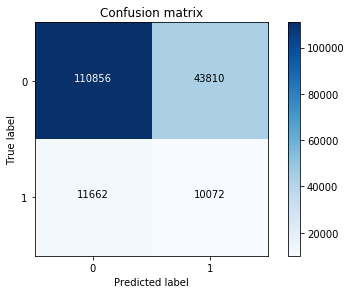

In [26]:
y_train_pre = lr1.predict(x_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 45.09825091772835%


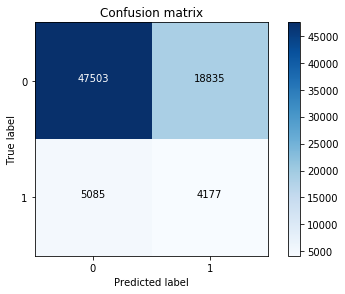

In [27]:
y_pre = lr1.predict(x_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [28]:
tmp = lr1.fit(x_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  4.5min finished


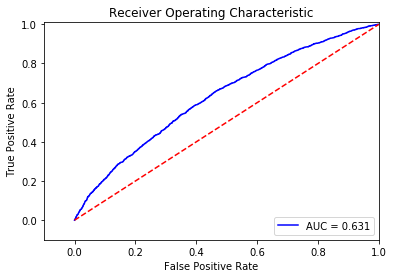

In [29]:
y_pred_sample_score = tmp.decision_function(x_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
roc_auc

0.6314298713668969

In [31]:
# values to evaluate
#k_values = [1, 2, 3, 4, 5, 6, 7]
#for k in k_values:
#    # define pipeline
#    model = DecisionTreeClassifier()
#    over = SMOTE(sampling_strategy=0.1, k_neighbors=k)
#    under = RandomUnderSampler(sampling_strategy=0.5)
#    steps = [('over', over), ('under', under), ('model', model)]
#    pipeline = Pipeline(steps=steps)
#    # evaluate pipeline
#    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#    score = mean(scores)
#    print('> k=%d, Mean ROC AUC: %.3f' % (k, score))

In [32]:
#logistic_regression_classifier = LogisticRegressionCV(cv=3,max_iter=1000)
#elastic_net_classifier = LogisticRegressionCV(cv=3, penalty='elasticnet', l1_ratios=[0.1, 0.5, 0.9], solver='saga',max_iter=1000)

In [33]:
#logistic_regression_classifier.fit(x_train, y_train)
#elastic_net_classifier.fit(x_train, y_train)

In [34]:
#print("Logistic Regression: {}".format(logistic_regression_classifier.score(x_test, y_test)))
#print("Logistic Regression: {} || Elasticnet: {}".format(logistic_regression_classifier.score(x_test, y_test), elastic_net_classifier.score(x_test, y_test)))

In [35]:
#from sklearn.metrics import classification_report

In [36]:
#print("Logistic Regression")
#print(classification_report(y_test, logistic_regression_classifier.predict(x_test)))
#print("Elastic Net")
#print(classification_report(y_test, elastic_net_classifier.predict(X_test)))